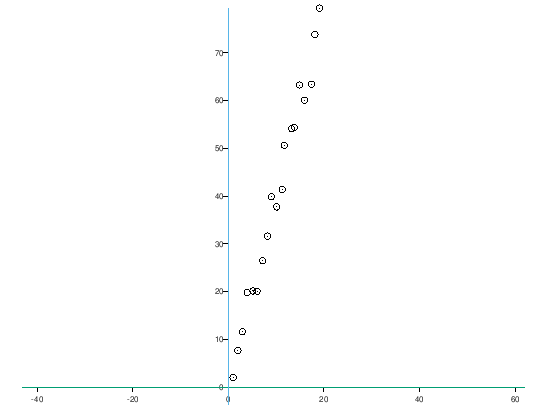

In [1]:
clear, clc, close all

#rng(0)
data = load('test.mat');
data = data.data;

#data(:,1) = randn(30,1);
#data(:,2) = 3.4 + 1.2 * data(:,1);
#data(:,2) = data(:,2) + 0.2*randn(size(data(:,1)));
#data = sortrows(data,1);

figure
axes('LineWidth',0.6,...
    'FontName','Helvetica',...
    'FontSize',8,...
    'XAxisLocation','Origin',...
    'YAxisLocation','Origin');
line(data(:,1),data(:,2),...
    'LineStyle','None',...
    'Marker','o');
axis equal

Step 1

First we have to mean center the data, i.e. substract the univariate means from the two columns, i.e. the two variables of data. In the following steps we therefore study the deviations from the mean(s) only.

In [2]:
data(:,1) = data(:,1)-mean(data(:,1));
data(:,2) = data(:,2)-mean(data(:,2));

Step 2

Next we calculate the covariance matrix of data. The covariance matrix contains all necessary information to rotate the coordinate system.

In [3]:
C = cov(data)

C =

    35.376   143.519
   143.519   591.541



Step 3

The rotation helps to create new variables which are uncorrelated, i.e. the covariance is zero for all pairs of the new variables. The decorrelation is achieved by diagonalizing the covariance matrix C. The eigenvectors V belonging to the diagonalized covariance matrix are a linear combination of the old base vectors, thus expressing the correlation between the old and the new time series. We find the eigenvalues of the covariance matrix C by solving the equation

In [4]:
[V,D] = eig(C)

V =

  -0.97176   0.23598
   0.23598   0.97176

D =

Diagonal Matrix

     0.52428           0
           0   626.39254



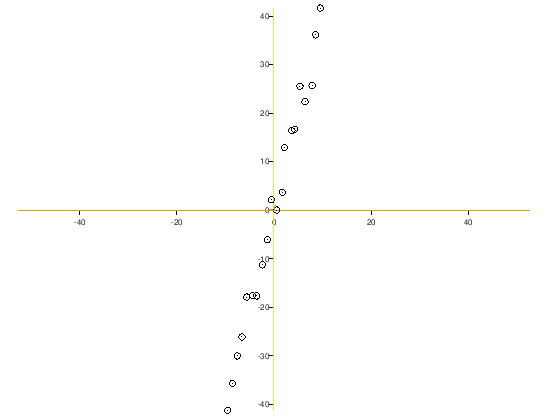

In [5]:
figure
axes('LineWidth',0.6,...
    'FontName','Helvetica',...
    'FontSize',8,...
    'XAxisLocation','Origin',...
    'YAxisLocation','Origin');
line(data(:,1),data(:,2),...
    'LineStyle','None',...
    'Marker','o');
line([0 V(1,1)],[0 V(2,1)],...
    'Color',[0.8 0.5 0.3],...
    'LineWidth',0.75);
line([0 V(1,2)],[0 V(2,2)],...
    'Color',[0.8 0.5 0.3],...
    'LineWidth',0.75);
axis equal

Step 4

Calculating the data set in the new coordinate system. We need to flip newdata left/right since the second column is the one with the larges eigenvalue.

In [6]:
newdata = V * data';
newdata = newdata';
#newdata = fliplr(newdata)

In [7]:
var(newdata)
var(newdata)/sum(var(newdata))

ans =

     0.52428   626.39254

ans =

   8.3628e-04   9.9916e-01



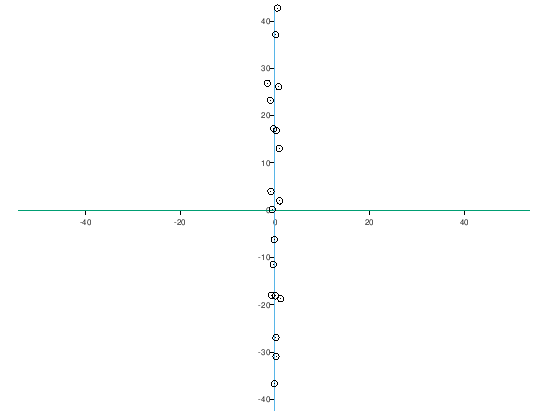

In [8]:
figure
axes('LineWidth',0.6,...
    'FontName','Helvetica',...
    'FontSize',8,...
    'XAxisLocation','Origin',...
    'YAxisLocation','Origin')
line(newdata(:,1),newdata(:,2),...
    'LineStyle','None',...
    'Marker','o');
axis equal

In [9]:
pkg load statistics
[coeff,newdata,latend,tsd] = princomp(data);
newdata
tsd

newdata =

  -42.30397   -0.44616
  -36.66642   -0.10192
  -30.93751    0.26792
  -26.90966    0.25314
  -18.69170    1.22550
  -18.09741    0.16382
  -17.96099   -0.71694
  -11.48355   -0.33012
   -6.22619   -0.11207
    1.97065    1.04634
    0.17929   -0.54547
    3.99473   -0.80230
   13.05403    0.95155
   16.80928    0.29154
   17.22254   -0.22516
   26.09048    0.83900
   23.23994   -0.93575
   26.85754   -1.56519
   37.12699    0.18438
   42.73194    0.55790

tsd =

   3.236724
   2.166113
   1.664913
   1.278259
   3.422375
   0.574047
   1.495405
   0.418385
   0.085841
   2.094437
   0.567566
   1.253222
   1.999061
   0.613195
   0.570230
   2.429368
   2.532381
   5.824276
   2.265400
   3.508800



In [10]:
corrcoef(newdata)

ans =

   1.0000e+00   3.2605e-15
   3.2605e-15   1.0000e+00

